**Description:**
In this document, we conduct initial data exploration and preprocessing to identify the most suitable machine learning model for our requirements.

1. Univariate analysis is conducted to assess the normal distribution of the data.
2. Box plots are employed to identify any outliers within the dataset.
3. Log transformation is applied to address both scenarios as necessary.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the dataset into a DataFrame
df = pd.read_csv("../Data/pollutant_dataset.csv")

In [5]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,0.324396,5.983593,57.601273,15.064598,3.251818
1,2000,Arkansas,0.327984,6.059882,53.942551,12.076962,2.859271
2,2000,Arizona,0.422265,9.915901,58.282240,7.400383,2.343078
3,2000,California,0.462393,10.756098,48.635815,10.896779,1.930857
4,2000,Colorado,0.383861,8.429847,59.836639,5.501561,2.511782


In [6]:
df.describe()

,Year,CO,NO2,O3,PM2.5,SO2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2007.500000,0.302597,6.161951,47.367012,8.745336,1.973423
std,4.612776,0.070662,2.357051,5.628940,2.444253,1.029085
min,2000.000000,0.149860,2.209519,33.503879,4.193077,0.463908
25%,2003.750000,0.245637,4.418765,43.367214,6.849606,1.200259
50%,2007.500000,0.297450,5.712806,47.179931,8.516392,1.696737
75%,2011.250000,0.349908,7.301862,51.704102,10.394954,2.405662
max,2015.000000,0.534212,16.775574,60.599370,15.432284,5.859533


In [7]:
df.dtypes

Year       int64
State     object
CO       float64
NO2      float64
O3       float64
PM2.5    float64
SO2      float64
dtype: object

In [8]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
O3       0
PM2.5    0
SO2      0
dtype: int64

In [9]:
df.shape

(768, 7)

In [10]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

Exploratory Data Analysis


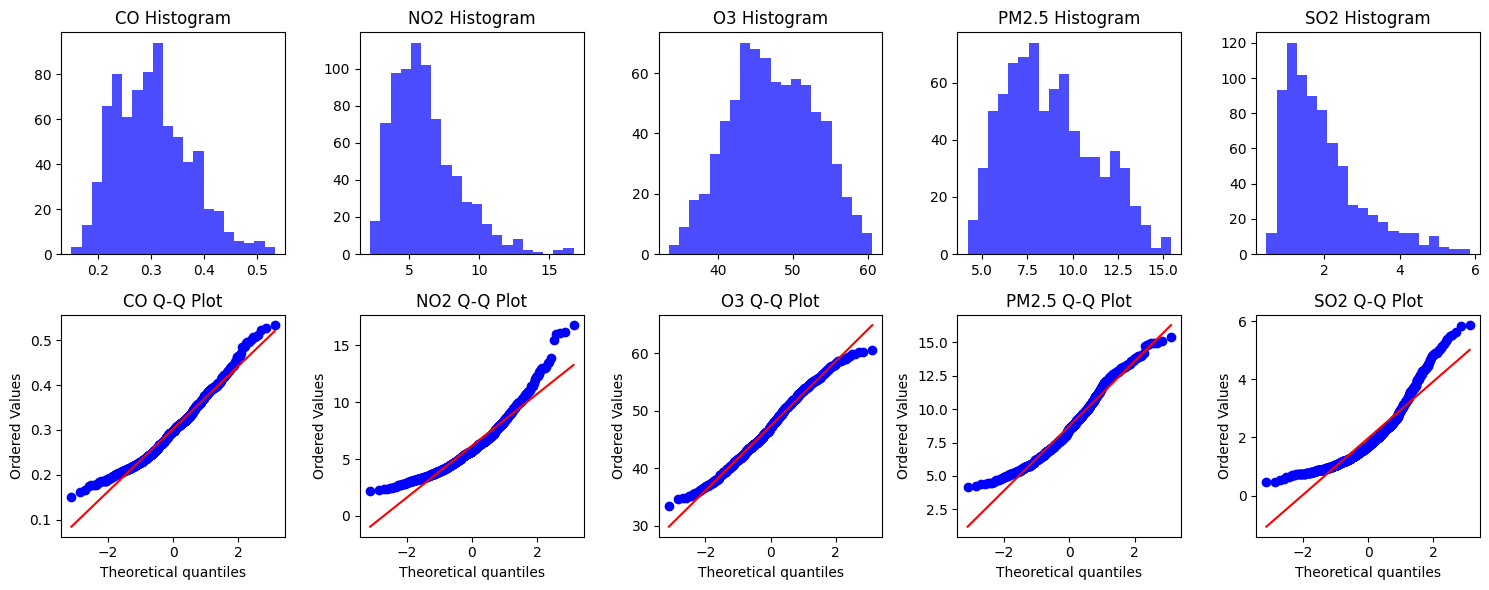

CO is not normally distributed (p-value: 5.951934990478105e-08)
NO2 is not normally distributed (p-value: 6.1438812558705206e-33)
O3 is not normally distributed (p-value: 1.5971914660976792e-08)
PM2.5 is not normally distributed (p-value: 1.0107494481868678e-11)
SO2 is not normally distributed (p-value: 4.7126602030509246e-35)


In [11]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

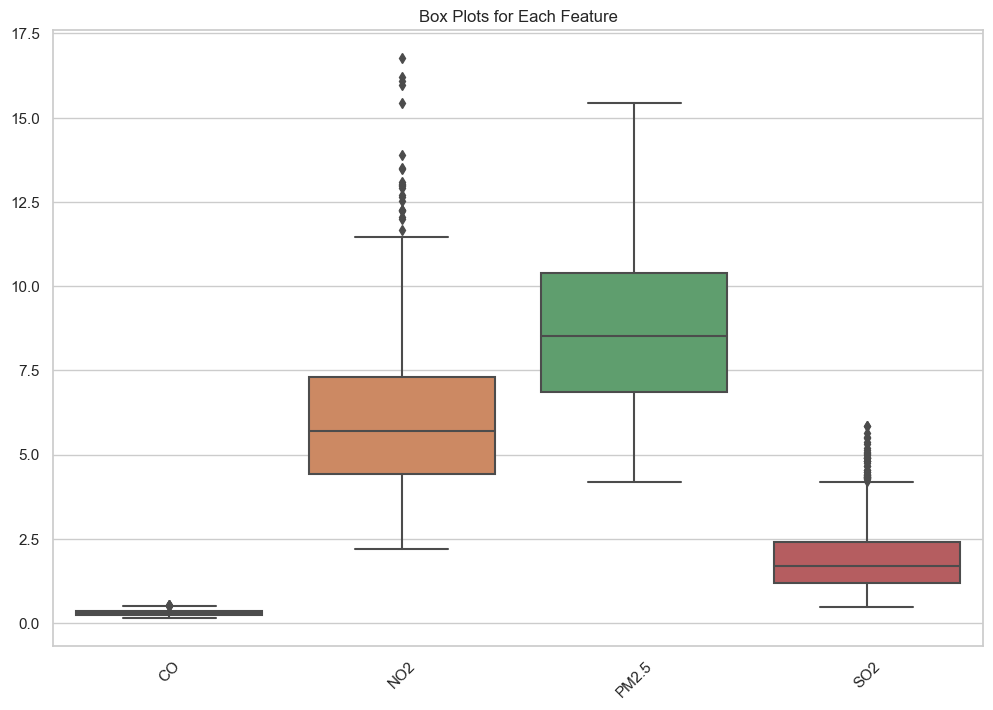

In [12]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [13]:
import numpy as np

df["CO"] = np.log(df["CO"])
df["NO2"] = np.log(df["NO2"])
df["PM2.5"] = np.log(df["PM2.5"])
df["SO2"] = np.log(df["SO2"])
df["O3"] = np.log(df["O3"])

In [14]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992


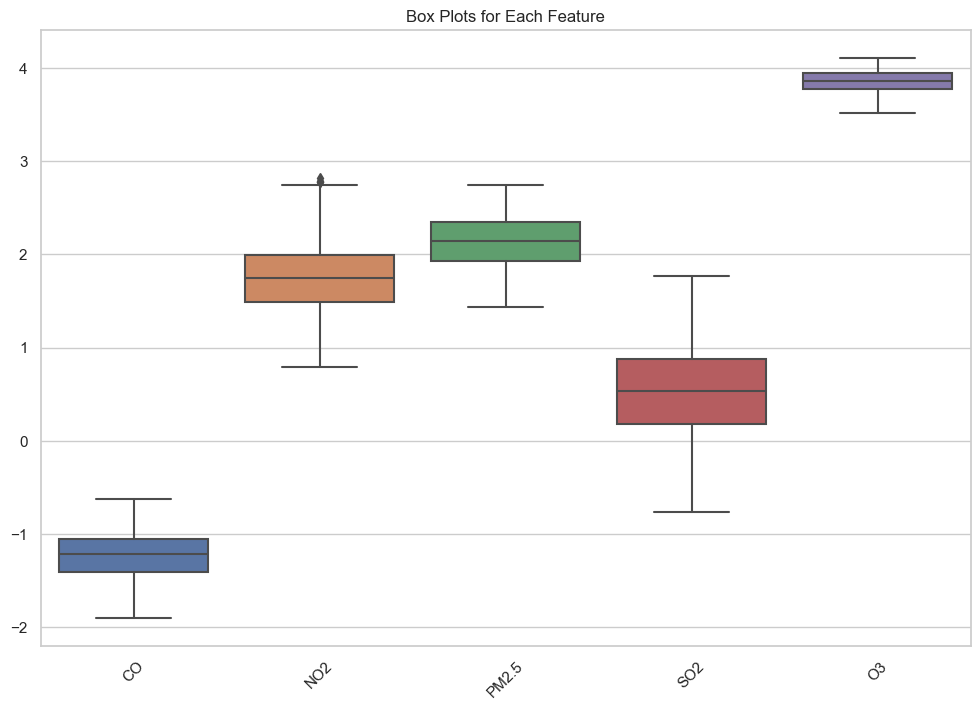

In [15]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2", "O3"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

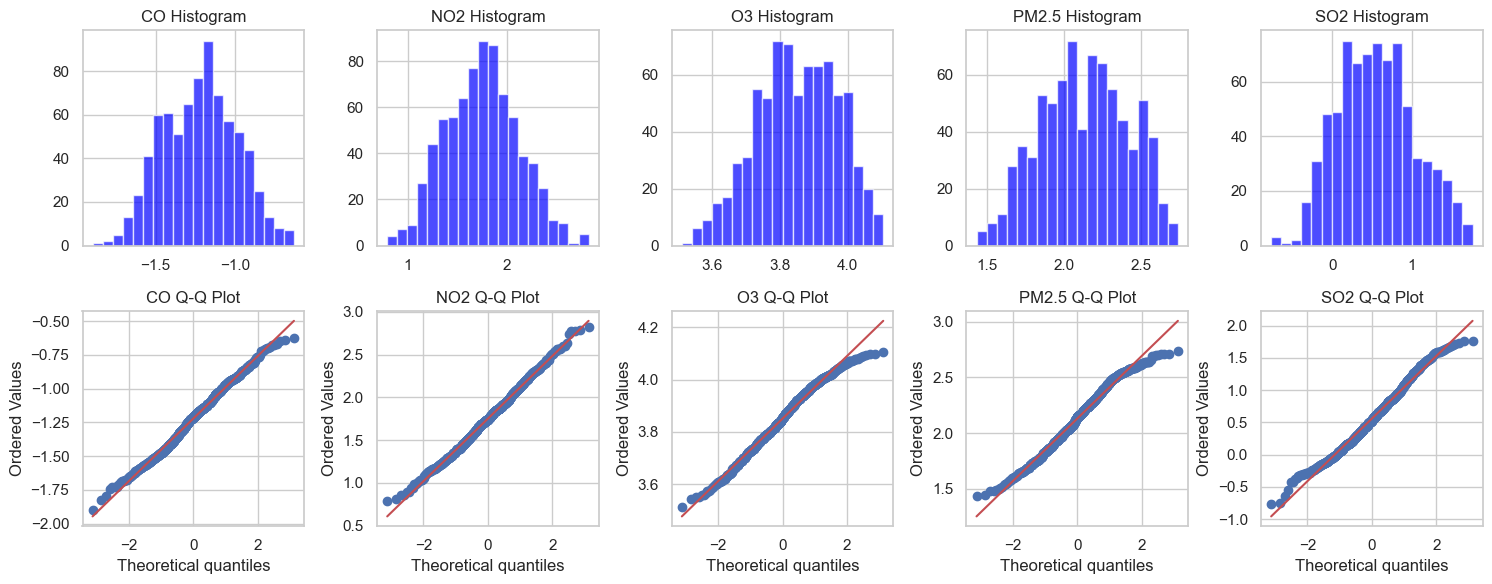

CO is not normally distributed (p-value: 0.0004752026669864313)
NO2 is normally distributed (p-value: 0.10736648371043549)
O3 is not normally distributed (p-value: 1.5847692783828248e-06)
PM2.5 is not normally distributed (p-value: 7.589604910910564e-13)
SO2 is not normally distributed (p-value: 6.406581433932922e-05)


In [16]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [17]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992


In [18]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables (features)
independent_vars = ["CO", "NO2", "O3", "SO2"]

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Variable         VIF
0       CO   61.337746
1      NO2   71.519121
2       O3  188.421114
3      SO2    5.697731


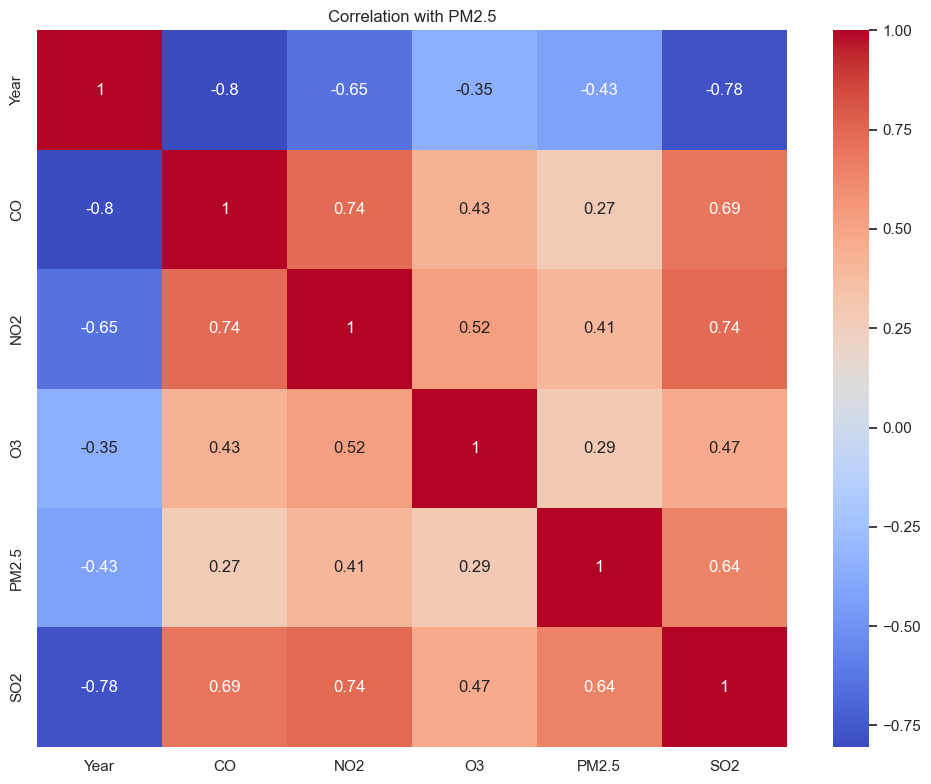

In [19]:
# Drop the 'State' column
corr_df = df.drop(columns=["State"])

# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = corr_df.corrwith(df["PM2.5"])

# Create a correlation matrix for all features
correlation_matrix = corr_df.corr()

# Plot the correlation matrix with 'PM2.5' using a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation with PM2.5")

plt.tight_layout()
plt.show()

Explained Variance for PC1: 0.7039
Explained Variance for PC2: 0.1589
Explained Variance for PC3: 0.0770
Explained Variance for PC4: 0.0603


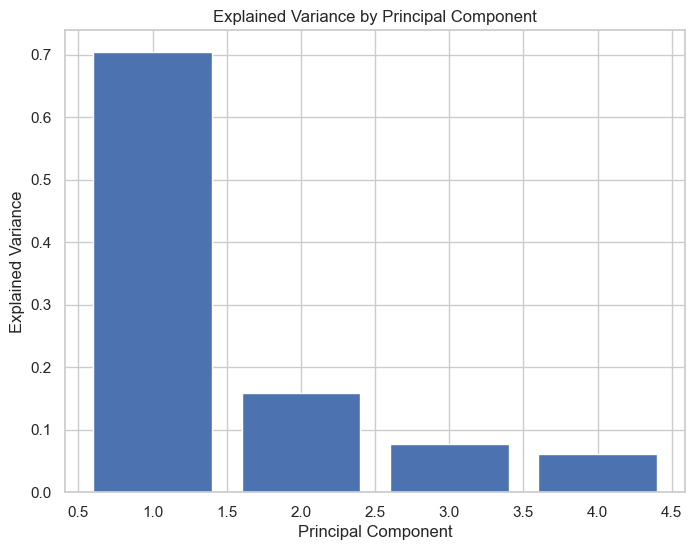

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {var:.4f}")

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Component")
plt.show()

In [21]:
print(pca_result)

[[-1.63216567 -1.06625552  0.56302883 -0.73582978]
 [-1.31216212 -0.6157319   0.36630783 -0.56926563]
 [-2.6546092  -0.740455   -0.74242149  0.16515114]
 ...
 [ 2.35792416 -0.05214182  0.27043518  0.13072862]
 [ 1.4916743  -0.06484719  0.28380804 -0.2140483 ]
 [ 1.32671929 -0.9019347  -0.03039263 -0.43047724]]


In [22]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])

# Add the 'Year' and 'State' columns back if needed
pca_df["Year"] = df["Year"]
pca_df["State"] = df["State"]
pca_df["PM2.5"] = df["PM2.5"]

# Print the DataFrame with the first 3 principal components
print(pca_df)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


In [23]:
pca_df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [24]:
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit with 2 splits
tscv = TimeSeriesSplit(n_splits=2)

# Split the data based on the "Year" column
for train_index, test_index in tscv.split(pca_df):
    train_data = pca_df.iloc[train_index]
    test_data = pca_df.iloc[test_index]

print(train_data)
print(test_data)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
507  1.532559  0.530844  0.822919  2010  New Hampshire  1.751572
508 -1.084516 -0.450412 -0.171723  2010     New Jersey  2.207029
509 -0.160522 -0.462526 -0.314423  2010     New Mexico  1.490716
510 -0.637699 -0.740661 -0.694691  2010         Nevada  1.502047
511  0.254899  0.397445 -0.274704  2010       New York  2.037290

[512 rows x 6 columns]
          PC1       PC2       PC3  Year          State     PM2.5
512 -0.480961 -0.418519  0.735844  2010           Ohio  2.436982
513  0.649612 -0.066788 -0.199795  2010       Oklahoma  2.185926
5

In [25]:
# Filter train and test data based on the specified years
# train_data = train_data[train_data['Year'] <= 2012]
# test_data = test_data[(test_data['Year'] >= 2013) & (test_data['Year'] <= 2015)]

# Separate the independent variables (X) and the target variable (y)
X_train = train_data.drop(columns=["PM2.5", "Year"])
y_train = train_data["PM2.5"]

X_test = test_data.drop(columns=["PM2.5", "Year"])
y_test = test_data["PM2.5"]

In [26]:
X_train.shape

(512, 4)

In [27]:
X_test.shape

(256, 4)

In [28]:
X_train = pd.get_dummies(X_train, columns=["State"], prefix="State")
X_test = pd.get_dummies(X_test, columns=["State"], prefix="State")

In [29]:
X_train

,PC1,PC2,PC3,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,-1.632166,-1.066256,0.563029,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.312162,-0.615732,0.366308,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-2.654609,-0.740455,-0.742421,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-2.148175,0.685029,-1.218686,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-2.367333,-1.103787,-0.360892,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.532559,0.530844,0.822919,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,-1.084516,-0.450412,-0.171723,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
509,-0.160522,-0.462526,-0.314423,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
510,-0.637699,-0.740661,-0.694691,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
X_test

,PC1,PC2,PC3,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
512,-0.480961,-0.418519,0.735844,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,0.649612,-0.066788,-0.199795,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,1.596549,1.221177,-0.421867,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,-0.700529,-0.013706,0.361152,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
516,-0.359253,0.346131,0.040925,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.360324,0.415647,-0.248117,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
764,2.411874,0.244212,-0.509862,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
765,2.357924,-0.052142,0.270435,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
766,1.491674,-0.064847,0.283808,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Model Building


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

print("model score on training data:",lr.score(X_train, y_train))
print("model score on test data:",lr.score(X_test, y_test))

r2score= 0.85148991300255
Mean absolute error =  0.0655120626025439
Mean Squared error =  0.006694543640412132
Root Mean Sqaured Error=  0.08182019090916454
model score on training data: 0.957183016940382
model score on test data: 0.85148991300255


In [32]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_score = cross_val_score(lr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9139089522560564

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.20727591916996757
Mean absolute error =  0.1777875725655494
Mean Squared error =  0.0544216321618665
Root Mean Sqaured Error=  0.233284444749037


In [ ]:
cv_score = cross_val_score(dtr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.27251689650707733

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=12)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.1486855823831741
Mean absolute error =  0.1502769227208865
Mean Squared error =  0.038375585360378495
Root Mean Sqaured Error=  0.19589687429966435


In [ ]:
cv_score = cross_val_score(rfr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6194251187844066

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.42247876616765523
Mean absolute error =  0.18750693280562702
Mean Squared error =  0.0641225547045332
Root Mean Sqaured Error=  0.25322431696923026


In [ ]:
cv_score = cross_val_score(lasso, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

-0.055658709362409645

In [35]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

NameError: name 'rfr' is not defined

In [36]:
cv_score = cross_val_score(knr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

NameError: name 'x' is not defined

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, random_state=0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.8515704626815027
Mean absolute error =  0.06549152353892007
Mean Squared error =  0.006690912618763215
Root Mean Sqaured Error=  0.08179799886771813


In [38]:
cv_score = cross_val_score(ridge, x, y, cv=3)
cv_mean = cv_score.mean()
cv_mean

NameError: name 'x' is not defined

Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.


<b>Hyper parameter Tuning<b>


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameter = {
    "fit_intercept": [True, False],
    "n_jobs": [42, -1, -10, 1, 10, 100, 200, 500, 35, 25],
}

In [41]:
GCV = GridSearchCV(LinearRegression(), parameter, cv=5)

In [42]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25]})

In [43]:
GCV.best_params_

{'fit_intercept': True, 'n_jobs': 42}

In [47]:
Final_mod = LinearRegression(fit_intercept=False, n_jobs=42)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
r2 = r2_score(y_test, pred)
cv_score = cross_val_score(Final_mod, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
print(r2, cv_mean)

print("model score on training data:",Final_mod.score(X_train, y_train))
print("model score on test data:",Final_mod.score(X_test, y_test))

0.851489913002552 0.9139089522560526
model score on training data: 0.957183016940382
model score on test data: 0.851489913002552


## Serialization


In [46]:
# Saving the model
import joblib

joblib.dump(Final_mod, "PM2.5predictor.pkl")

['PM2.5predictor.pkl']